In [ ]:
!pip install kaggle


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d thefool484/topology-optimization-top88


Dataset URL: https://www.kaggle.com/datasets/thefool484/topology-optimization-top88
License(s): MIT
  0% 0.00/3.36M [00:00<?, ?B/s]
100% 3.36M/3.36M [00:00<00:00, 102MB/s]


In [ ]:
!unzip topology-optimization-top88.zip -d topology_data


Archive:  topology-optimization-top88.zip
  inflating: topology_data/To-Data-ver2/Combine/test/images/0.020_midload.png  
  inflating: topology_data/To-Data-ver2/Combine/test/images/0.044_midload.png  
  inflating: topology_data/To-Data-ver2/Combine/test/images/0.067_midload.png  
  inflating: topology_data/To-Data-ver2/Combine/test/images/0.075_endload.png  
  inflating: topology_data/To-Data-ver2/Combine/test/images/0.078_midload.png  
  inflating: topology_data/To-Data-ver2/Combine/test/images/0.134_endload.png  
  inflating: topology_data/To-Data-ver2/Combine/test/images/0.229_endload.png  
  inflating: topology_data/To-Data-ver2/Combine/test/images/0.230_endload.png  
  inflating: topology_data/To-Data-ver2/Combine/test/images/0.230_midload.png  
  inflating: topology_data/To-Data-ver2/Combine/test/images/0.258_endload.png  
  inflating: topology_data/To-Data-ver2/Combine/test/images/0.300_endload.png  
  inflating: topology_data/To-Data-ver2/Combine/test/images/0.307_midload.png 

In [ ]:
import os

# List all files in the directory
files = os.listdir("topology_data")
print(files)


['To-Data-ver2']


In [ ]:
# List all files in the 'To-Data-ver2' folder
sub_files = os.listdir("topology_data/To-Data-ver2")
print(sub_files)


['Midload', 'Endload', 'Combine']


In [ ]:
# List files in the 'Midload' folder
midload_files = os.listdir("topology_data/To-Data-ver2/Midload")
print("Files in 'Midload':", midload_files)

# List files in the 'Endload' folder
endload_files = os.listdir("topology_data/To-Data-ver2/Endload")
print("Files in 'Endload':", endload_files)

# List files in the 'Combine' folder
combine_files = os.listdir("topology_data/To-Data-ver2/Combine")
print("Files in 'Combine':", combine_files)


Files in 'Midload': ['test', 'val', 'train']
Files in 'Endload': ['test', 'val', 'train']
Files in 'Combine': ['test', 'val', 'train']


In [ ]:
import os

# Define the base directory
base_dir = "topology_data/To-Data-ver2"

# Define subdirectories
subdirs = ["Midload", "Endload", "Combine"]
subfolders = ["train", "val", "test"]

# Iterate through each subdirectory and subfolder
for subdir in subdirs:
    print(f"--- Files in '{subdir}' ---")
    for subfolder in subfolders:
        folder_path = os.path.join(base_dir, subdir, subfolder)
        if os.path.exists(folder_path):
            files = os.listdir(folder_path)
            print(f"Files in '{subfolder}':", files)
        else:
            print(f"Subfolder '{subfolder}' does not exist in '{subdir}'")
    print()


--- Files in 'Midload' ---
Files in 'train': ['labels', 'images']
Files in 'val': ['labels', 'images']
Files in 'test': ['labels', 'images']

--- Files in 'Endload' ---
Files in 'train': ['labels', 'images']
Files in 'val': ['labels', 'images']
Files in 'test': ['labels', 'images']

--- Files in 'Combine' ---
Files in 'train': ['labels', 'images']
Files in 'val': ['labels', 'images']
Files in 'test': ['labels', 'images']



In [ ]:
import os

# Check the files in the labels directory
for file in os.listdir(labels_dir):
    label_path = os.path.join(labels_dir, file)
    print(file, "is binary:", open(label_path, "rb").read(1) == b'\x89')  # Check binary signature


0.860_midload.png is binary: True
0.550_midload.png is binary: True
0.800_midload.png is binary: True
0.280_midload.png is binary: True
0.540_midload.png is binary: True
0.310_midload.png is binary: True
0.690_midload.png is binary: True
0.110_midload.png is binary: True
0.720_midload.png is binary: True
0.220_midload.png is binary: True
0.500_midload.png is binary: True
0.390_midload.png is binary: True
0.020_midload.png is binary: True
0.460_midload.png is binary: True
0.590_midload.png is binary: True
0.250_midload.png is binary: True
0.130_midload.png is binary: True
0.910_midload.png is binary: True
0.660_midload.png is binary: True
0.580_midload.png is binary: True
0.330_midload.png is binary: True
0.200_midload.png is binary: True
0.510_midload.png is binary: True
0.340_midload.png is binary: True
0.240_midload.png is binary: True
0.940_midload.png is binary: True
0.920_midload.png is binary: True
0.180_midload.png is binary: True
0.090_midload.png is binary: True
0.880_midload.

In [ ]:
import os
from PIL import Image
import numpy as np

# Define the base paths
base_dir = "topology_data/To-Data-ver2"
scenario = "Midload"  # Choose 'Midload', 'Endload', or 'Combine'
subset = "train"  # Choose 'train', 'val', or 'test'

# Define directories for images and labels
images_dir = os.path.join(base_dir, scenario, subset, "images")
labels_dir = os.path.join(base_dir, scenario, subset, "labels")

# Load input images
input_images = []
image_files = sorted(os.listdir(images_dir))
for file in image_files:
    img_path = os.path.join(images_dir, file)
    img = Image.open(img_path).convert("L")  # Convert to grayscale
    img_resized = img.resize((128, 128))  # Resize to 128x128 (optional)
    input_images.append(np.array(img_resized))

# Load label images
label_images = []
label_files = sorted(os.listdir(labels_dir))
for file in label_files:
    label_path = os.path.join(labels_dir, file)
    label_img = Image.open(label_path).convert("L")  # Convert to grayscale
    label_resized = label_img.resize((128, 128))  # Resize to match input images
    label_images.append(np.array(label_resized))

# Convert to numpy arrays
input_images = np.array(input_images)
label_images = np.array(label_images)

# Print shapes for verification
print("Input Images Shape:", input_images.shape)
print("Label Images Shape:", label_images.shape)


Input Images Shape: (95, 128, 128)
Label Images Shape: (95, 128, 128)


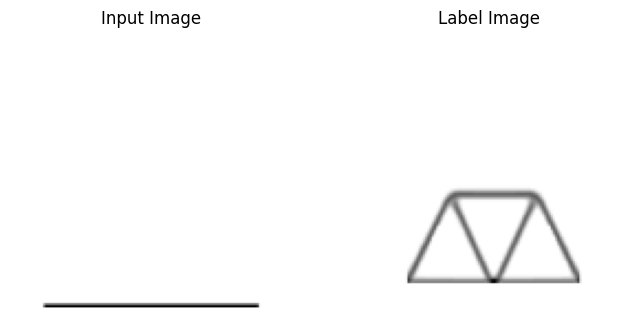

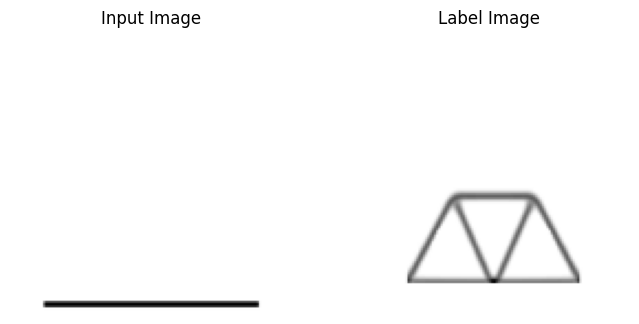

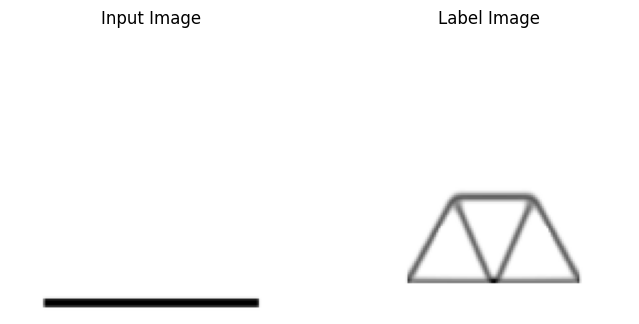

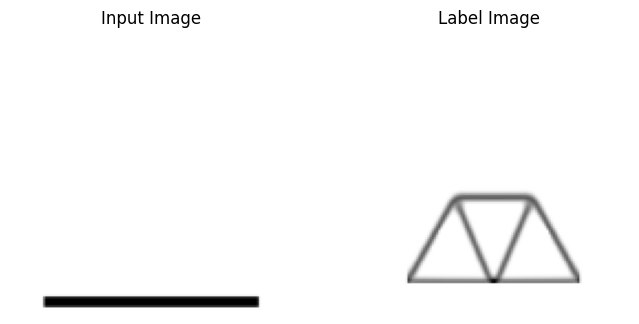

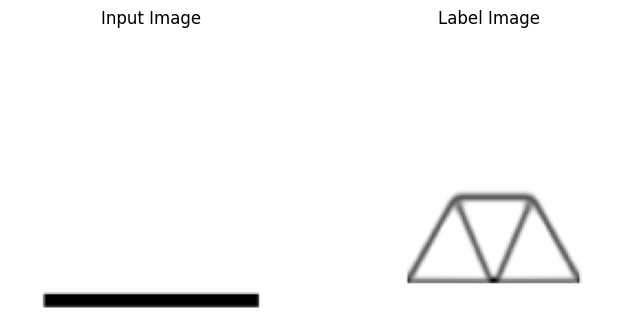

In [ ]:
import matplotlib.pyplot as plt

for i in range(5):
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(input_images[i], cmap="gray")
    plt.title("Input Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(label_images[i], cmap="gray")
    plt.title("Label Image")
    plt.axis("off")

    plt.show()


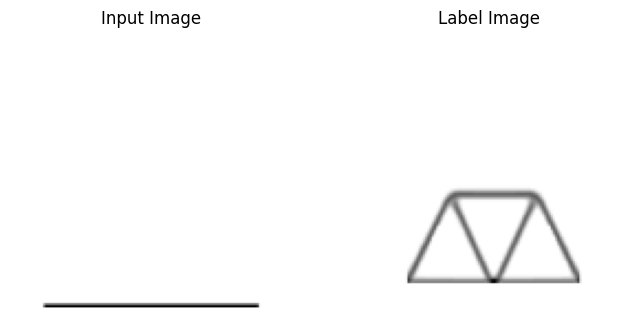

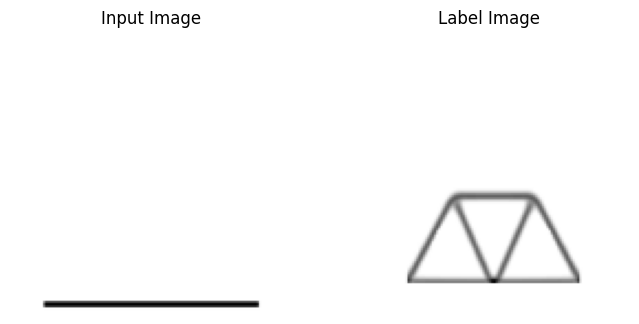

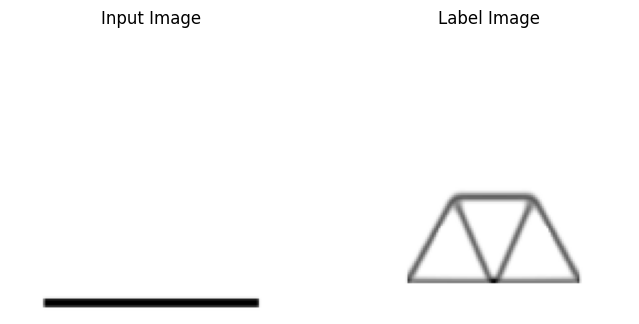

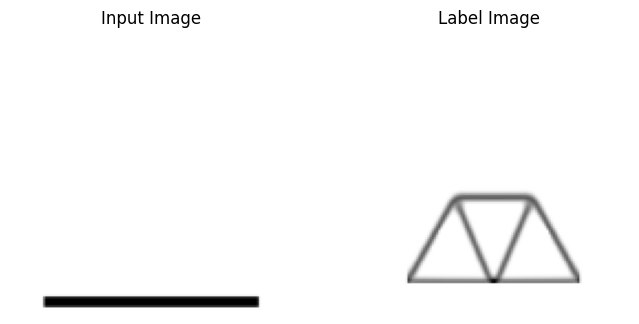

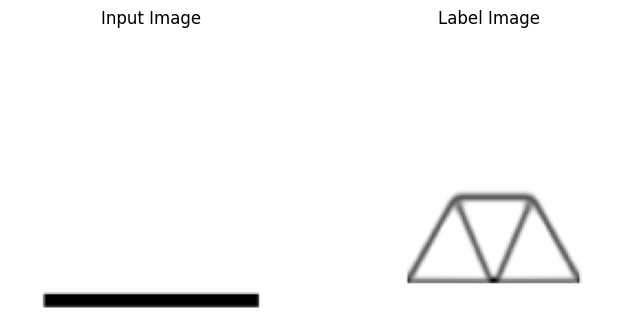

In [ ]:
import matplotlib.pyplot as plt

# Display a few input-label pairs
for i in range(5):  # Adjust the range if needed
    plt.figure(figsize=(8, 4))

    # Input image
    plt.subplot(1, 2, 1)
    plt.imshow(input_images[i], cmap="gray")
    plt.title("Input Image")
    plt.axis("off")

    # Corresponding label image
    plt.subplot(1, 2, 2)
    plt.imshow(label_images[i], cmap="gray")
    plt.title("Label Image")
    plt.axis("off")

    plt.show()


In [ ]:
input_images = input_images / 255.0
label_images = label_images / 255.0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    input_images, label_images, test_size=0.2, random_state=42
)

print("Training Set Shape:", X_train.shape, y_train.shape)
print("Validation Set Shape:", X_val.shape, y_val.shape)


Training Set Shape: (76, 128, 128) (76, 128, 128)
Validation Set Shape: (19, 128, 128) (19, 128, 128)


In [ ]:
pip install tensorflow


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Define U-Net Model
def unet_model(input_shape=(128, 128, 1)):
    inputs = Input(input_shape)

    # Encoder
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)

    # Bottleneck
    c4 = Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    c4 = Conv2D(512, (3, 3), activation='relu', padding='same')(c4)

    # Decoder
    u1 = UpSampling2D((2, 2))(c4)
    u1 = Concatenate()([u1, c3])
    c5 = Conv2D(256, (3, 3), activation='relu', padding='same')(u1)
    c5 = Conv2D(256, (3, 3), activation='relu', padding='same')(c5)

    u2 = UpSampling2D((2, 2))(c5)
    u2 = Concatenate()([u2, c2])
    c6 = Conv2D(128, (3, 3), activation='relu', padding='same')(u2)
    c6 = Conv2D(128, (3, 3), activation='relu', padding='same')(c6)

    u3 = UpSampling2D((2, 2))(c6)
    u3 = Concatenate()([u3, c1])
    c7 = Conv2D(64, (3, 3), activation='relu', padding='same')(u3)
    c7 = Conv2D(64, (3, 3), activation='relu', padding='same')(c7)

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c7)

    model = Model(inputs, outputs)
    return model

# Instantiate the model
input_shape = (128, 128, 1)  # Grayscale images
model = unet_model(input_shape)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Display model summary
model.summary()

# Prepare data for training (add channel dimension to images for compatibility)
X_train = X_train[..., np.newaxis]  # Add channel dimension
X_val = X_val[..., np.newaxis]
y_train = y_train[..., np.newaxis]
y_val = y_val[..., np.newaxis]

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=8,
    verbose=1
)

# Save the trained model
model.save('/mnt/data/unet_topology_model.h5')


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 128, 128, 1)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 128, 128, 64)   │            640 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 128, 128, 64)   │         36,928 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 64, 64, 64)     │              0 │ conv2d_1[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 64, 64, 128)    │         73,856 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 64, 64, 128)    │        147,584 │ conv2d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 32, 32, 128)    │              0 │ conv2d_3[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 32, 32, 256)    │        295,168 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 32, 32, 256)    │        590,080 │ conv2d_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 16, 16, 256)    │              0 │ conv2d_5[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 16, 16, 512)    │      1,180,160 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 16, 16, 512)    │      2,359,808 │ conv2d_6[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ up_sampling2d             │ (None, 32, 32, 512)    │              0 │ conv2d_7[0][0]         │
│ (UpSampling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 32, 32, 768)    │              0 │ up_sampling2d[0][0],   │
│                           │                        │                │ conv2d_5[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 32, 32, 256)    │      1,769,728 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_9 (Conv2D)         │ (None, 32, 32, 256)    │        590,080 │ conv2d_8[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ up_sampling2d_1           │ (None, 64, 64, 256)    │              0 │ conv2d_9[0][0]         │
│ (UpSampling2D)       

 Total params: 7,781,761 (29.69 MB)

 Trainable params: 7,781,761 (29.69 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 119s 11s/step - loss: 0.1834 - mae: 0.3491 - val_loss: 0.0825 - val_mae: 0.1388
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 111s 11s/step - loss: 0.0775 - mae: 0.1334 - val_loss: 0.0518 - val_mae: 0.0630
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 140s 11s/step - loss: 0.0474 - mae: 0.0597 - val_loss: 0.0440 - val_mae: 0.0748
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 143s 11s/step - loss: 0.0397 - mae: 0.0682 - val_loss: 0.0355 - val_mae: 0.0686
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 113s 11s/step - loss: 0.0328 - mae: 0.0643 - val_loss: 0.0314 - val_mae: 0.0636
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 110s 11s/step - loss: 0.0301 - mae: 0.0612 - val_loss: 0.0320 - val_mae: 0.0881
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 143s 11s/step - loss: 0.0295 - mae: 0.0680 - val_loss: 0.0285 - val_mae: 0.0549
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 141s 11s/step - loss: 0.0302 - mae: 0.0617 - val_loss: 0.0309 - val_mae: 0.0620
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 144s 11s/step - lo

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


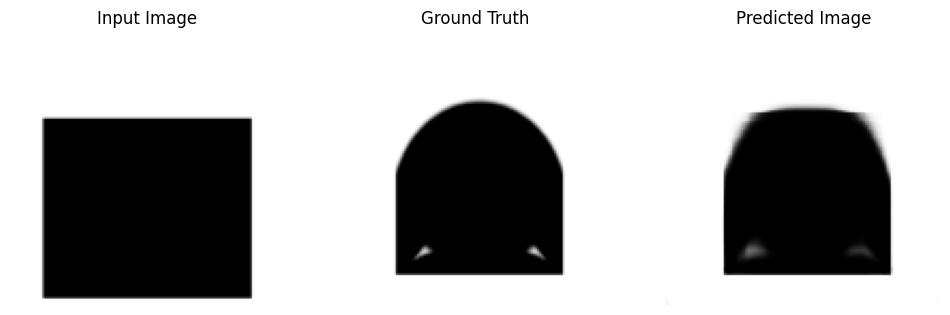

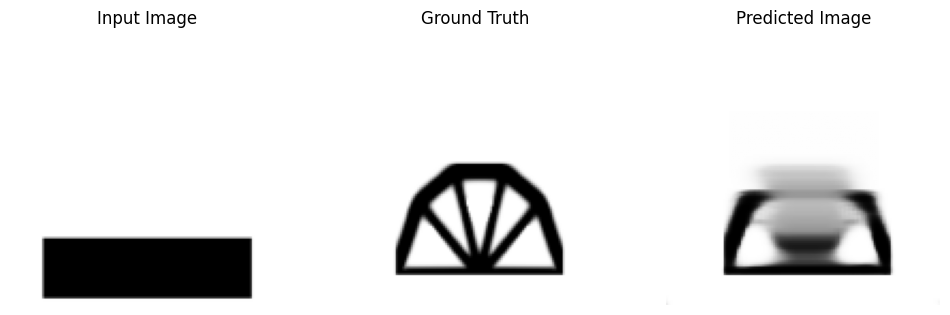

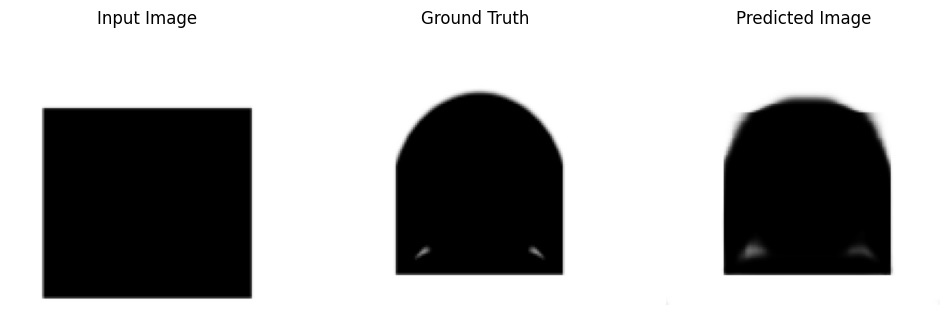

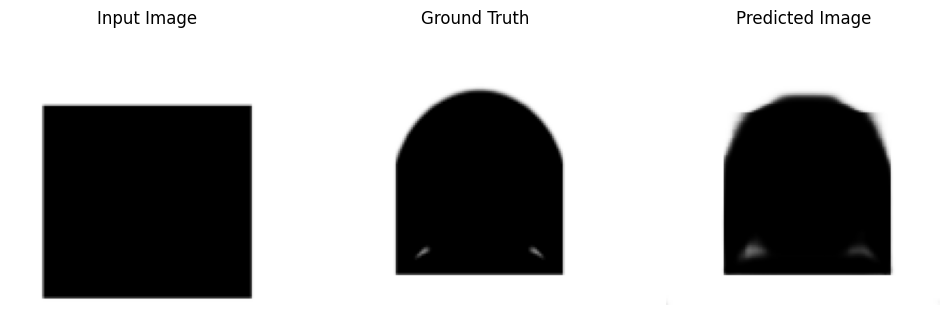

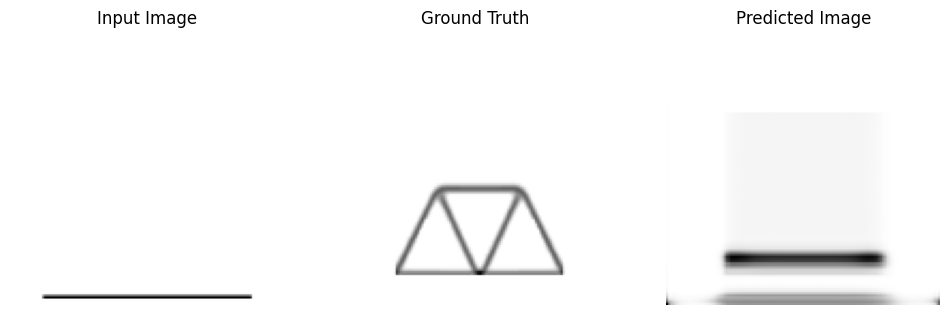

In [ ]:
import matplotlib.pyplot as plt

# Predict on validation data
predictions = model.predict(X_val)

# Visualize a few predictions
for i in range(5):  # Display first 5 samples
    plt.figure(figsize=(12, 4))

    # Input Image
    plt.subplot(1, 3, 1)
    plt.imshow(X_val[i].squeeze(), cmap='gray')
    plt.title("Input Image")
    plt.axis("off")

    # Ground Truth
    plt.subplot(1, 3, 2)
    plt.imshow(y_val[i].squeeze(), cmap='gray')
    plt.title("Ground Truth")
    plt.axis("off")

    # Predicted Image
    plt.subplot(1, 3, 3)
    plt.imshow(predictions[i].squeeze(), cmap='gray')
    plt.title("Predicted Image")
    plt.axis("off")

    plt.show()


In [ ]:
from skimage.metrics import structural_similarity as ssim
import numpy as np

# Calculate SSIM for the validation set
ssim_scores = []
for i in range(len(X_val)):
    ssim_score = ssim(y_val[i].squeeze(), predictions[i].squeeze(), data_range=1.0)
    ssim_scores.append(ssim_score)

# Compute average SSIM
avg_ssim = np.mean(ssim_scores)
print("Average SSIM:", avg_ssim)


Average SSIM: 0.8547348873793759


In [ ]:
from tensorflow.keras.optimizers import Adam

# Compile the model with a reduced learning rate
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse', metrics=['mae'])

# Fine-tune the model
history_fine_tune = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=8,
    verbose=1
)


Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 120s 11s/step - loss: 0.0115 - mae: 0.0296 - val_loss: 0.0145 - val_mae: 0.0357
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 136s 11s/step - loss: 0.0101 - mae: 0.0270 - val_loss: 0.0135 - val_mae: 0.0352
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 110s 11s/step - loss: 0.0105 - mae: 0.0275 - val_loss: 0.0135 - val_mae: 0.0354
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 141s 11s/step - loss: 0.0096 - mae: 0.0256 - val_loss: 0.0132 - val_mae: 0.0347
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 143s 11s/step - loss: 0.0103 - mae: 0.0274 - val_loss: 0.0131 - val_mae: 0.0331
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 139s 11s/step - loss: 0.0127 - mae: 0.0320 - val_loss: 0.0131 - val_mae: 0.0342
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 144s 11s/step - loss: 0.0103 - mae: 0.0273 - val_loss: 0.0131 - val_mae: 0.0331
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 140s 11s/step - loss: 0.0101 - mae: 0.0262 - val_loss: 0.0133 - val_mae: 0.0333
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 109s 11s/step - lo

In [ ]:
import tensorflow as tf

# Define SSIM-based loss function
def ssim_loss(y_true, y_pred):
    return 1 - tf.reduce_mean(tf.image.ssim(y_true, y_pred, max_val=1.0))

# Define combined loss function: MSE + SSIM
def combined_loss(y_true, y_pred):
    mse_loss = tf.keras.losses.MeanSquaredError()(y_true, y_pred)
    ssim_loss_value = ssim_loss(y_true, y_pred)
    return mse_loss + ssim_loss_value

# Compile the model with the combined loss function
model.compile(optimizer=Adam(learning_rate=0.0001), loss=combined_loss, metrics=['mae'])

# Train the model again with the enhanced loss function
history_combined_loss = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=8,
    verbose=1
)


Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 155s 12s/step - loss: 0.1109 - mae: 0.0263 - val_loss: 0.1190 - val_mae: 0.0285
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 138s 12s/step - loss: 0.0935 - mae: 0.0218 - val_loss: 0.1149 - val_mae: 0.0277
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 145s 12s/step - loss: 0.1010 - mae: 0.0249 - val_loss: 0.1137 - val_mae: 0.0272
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 140s 12s/step - loss: 0.0926 - mae: 0.0223 - val_loss: 0.1108 - val_mae: 0.0272
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 122s 12s/step - loss: 0.0922 - mae: 0.0233 - val_loss: 0.1105 - val_mae: 0.0268
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 141s 12s/step - loss: 0.0927 - mae: 0.0218 - val_loss: 0.1087 - val_mae: 0.0272
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 120s 12s/step - loss: 0.0956 - mae: 0.0238 - val_loss: 0.1062 - val_mae: 0.0264
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 144s 12s/step - loss: 0.0848 - mae: 0.0207 - val_loss: 0.1057 - val_mae: 0.0265
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 143s 12s/step - lo

In [ ]:
predictions = model.predict(X_val)


1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


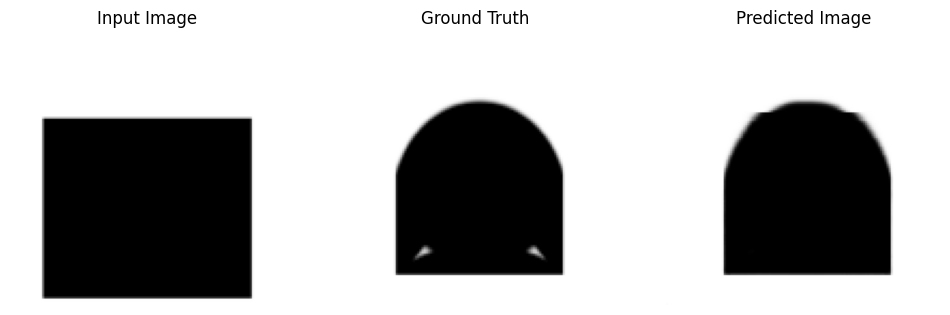

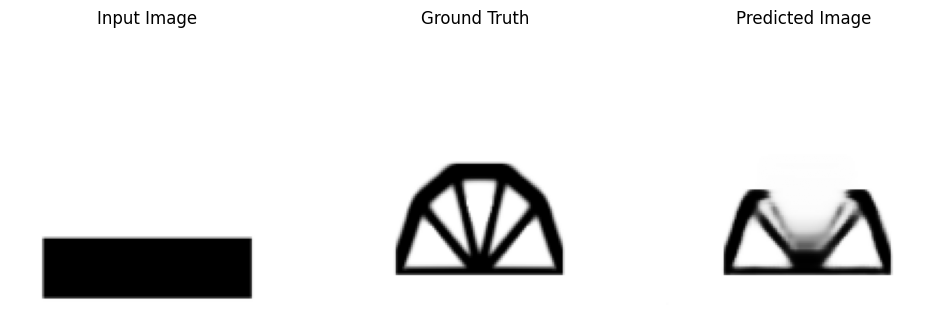

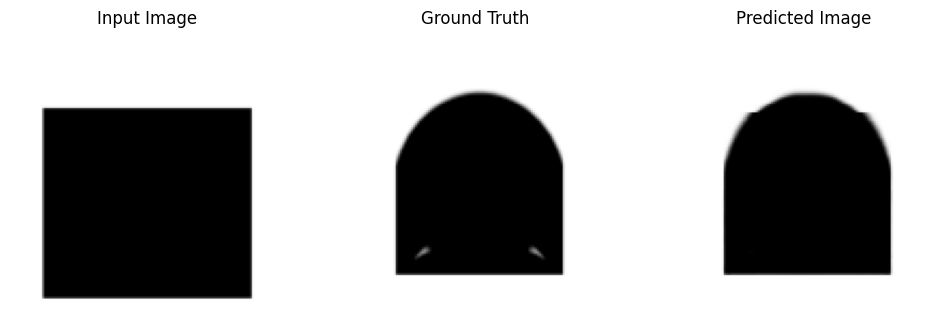

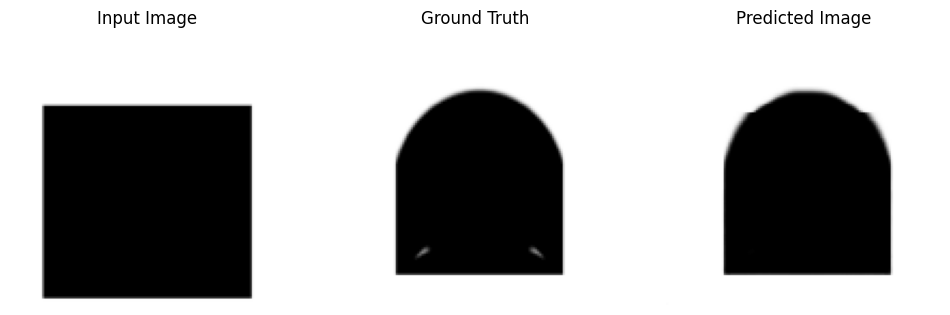

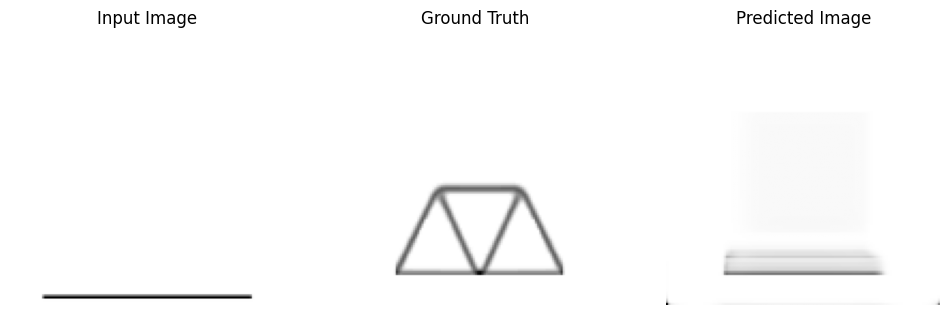

In [ ]:
import matplotlib.pyplot as plt

for i in range(5):
    plt.figure(figsize=(12, 4))

    # Input Image
    plt.subplot(1, 3, 1)
    plt.imshow(X_val[i].squeeze(), cmap='gray')
    plt.title("Input Image")
    plt.axis("off")

    # Ground Truth
    plt.subplot(1, 3, 2)
    plt.imshow(y_val[i].squeeze(), cmap='gray')
    plt.title("Ground Truth")
    plt.axis("off")

    # Predicted Image
    plt.subplot(1, 3, 3)
    plt.imshow(predictions[i].squeeze(), cmap='gray')
    plt.title("Predicted Image")
    plt.axis("off")

    plt.show()


In [ ]:
from skimage.metrics import structural_similarity as ssim
import numpy as np

ssim_scores = [ssim(y_val[i].squeeze(), predictions[i].squeeze(), data_range=1.0) for i in range(len(X_val))]
avg_ssim = np.mean(ssim_scores)
print("Average SSIM:", avg_ssim)


Average SSIM: 0.9169042365383471


In [ ]:
# Save the model in the recommended native Keras format
model.save('/mnt/data/final_unet_topology_model.keras')


In [ ]:
model.save('/mnt/data/final_unet_topology_model.h5', save_format='h5')


visulazation of model 1
**bold text**

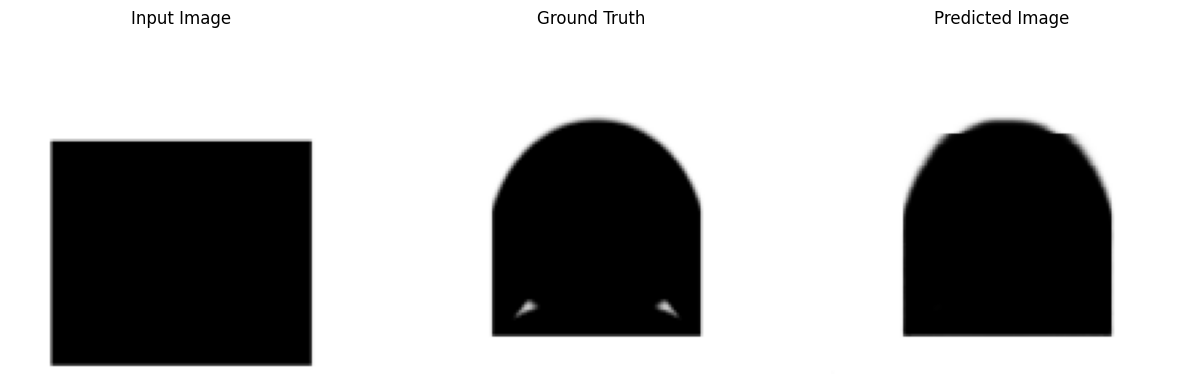

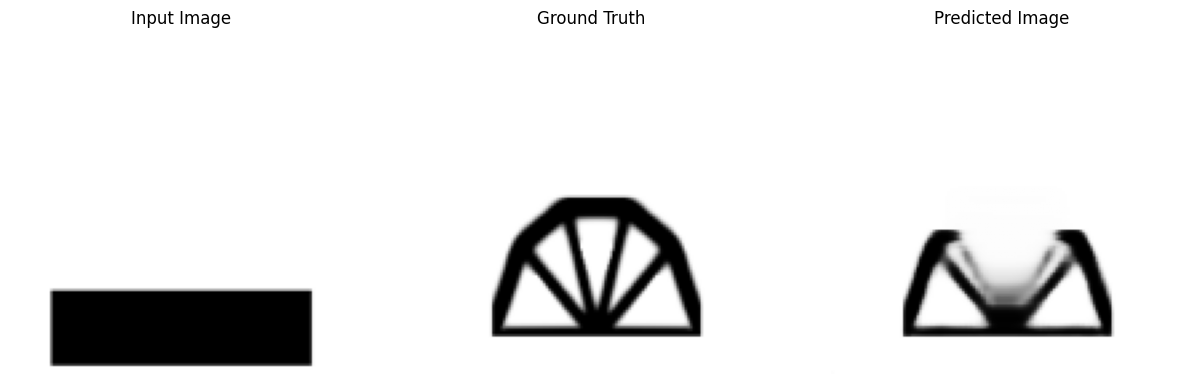

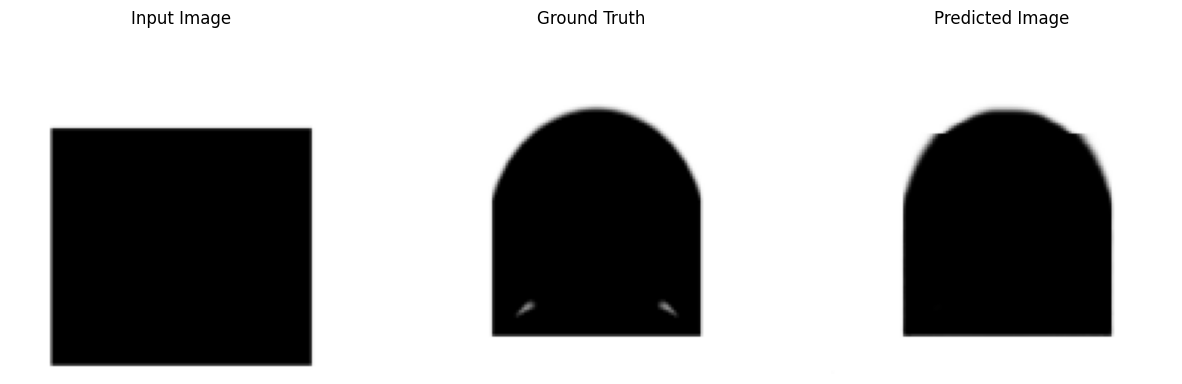

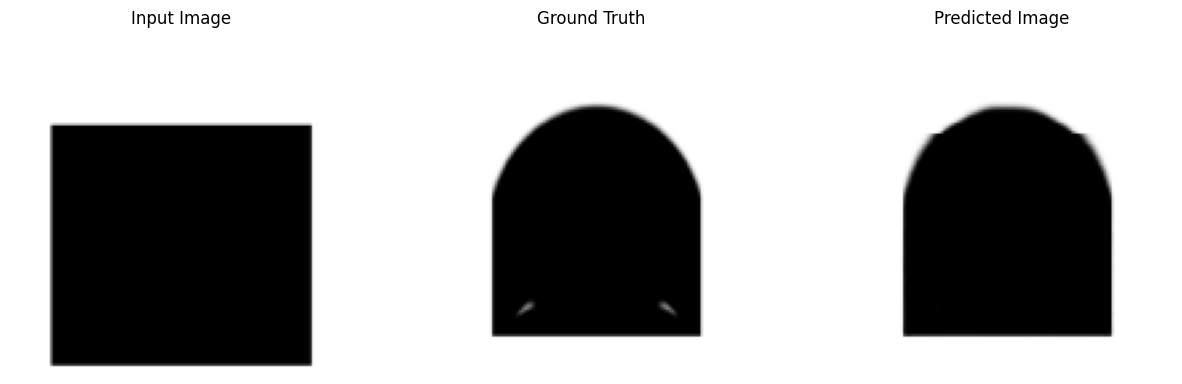

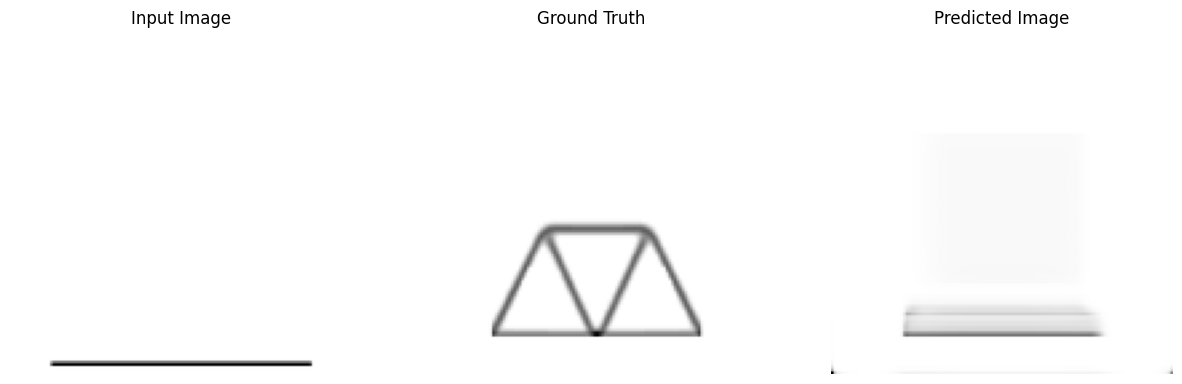

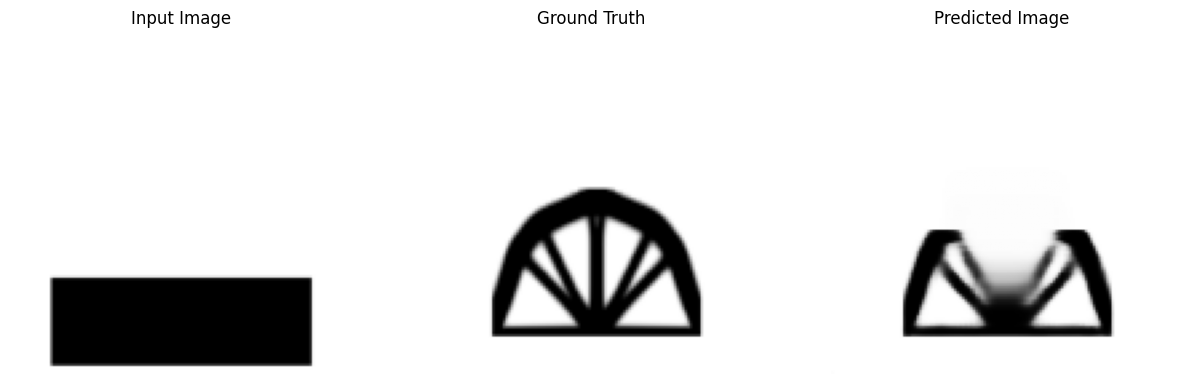

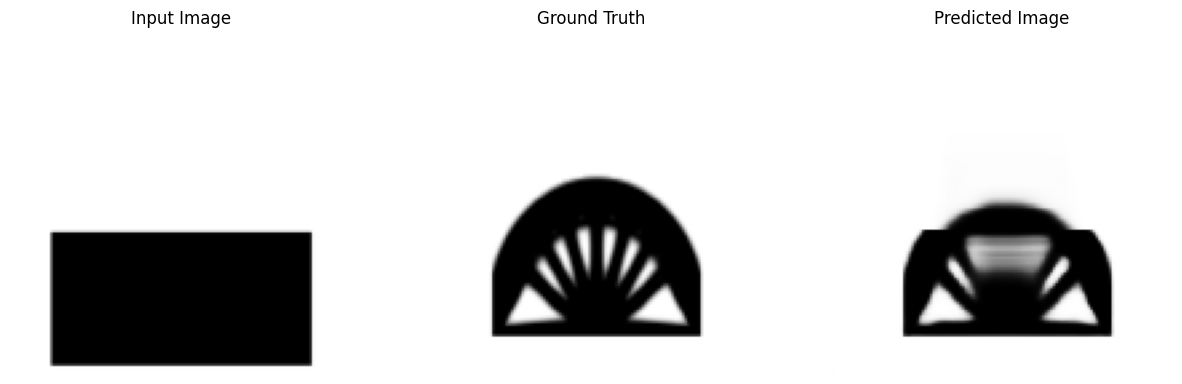

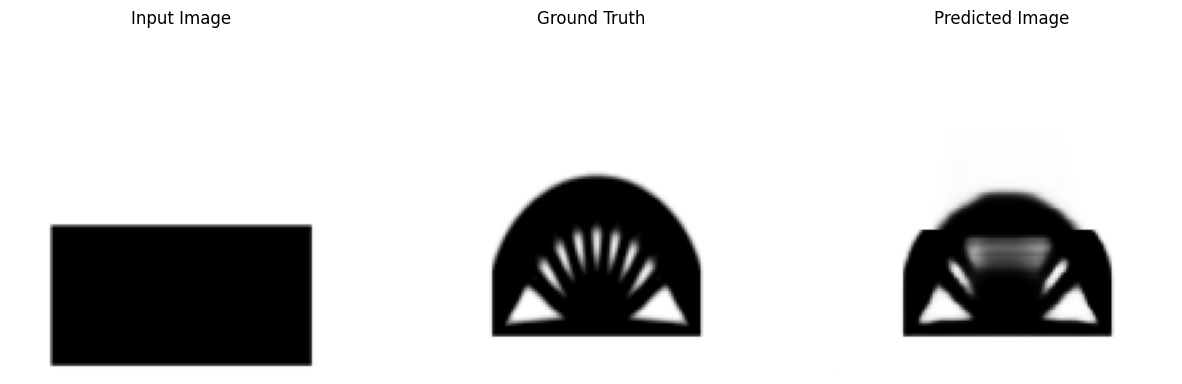

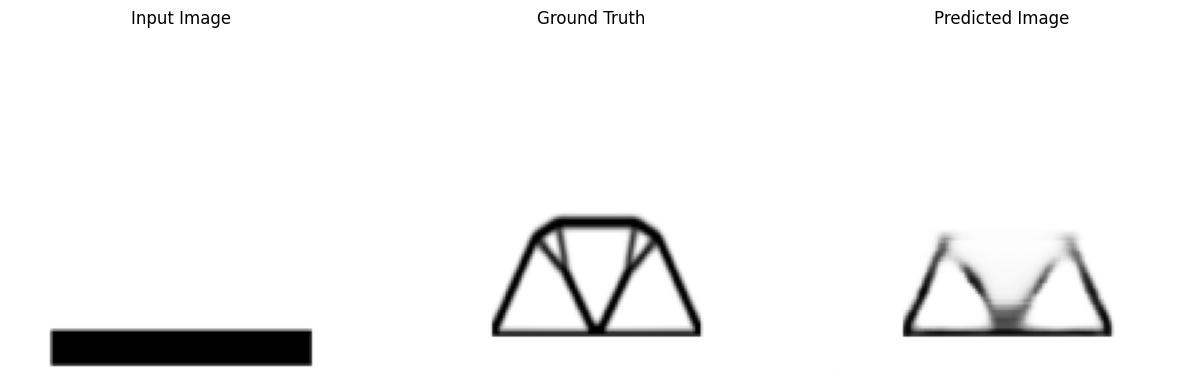

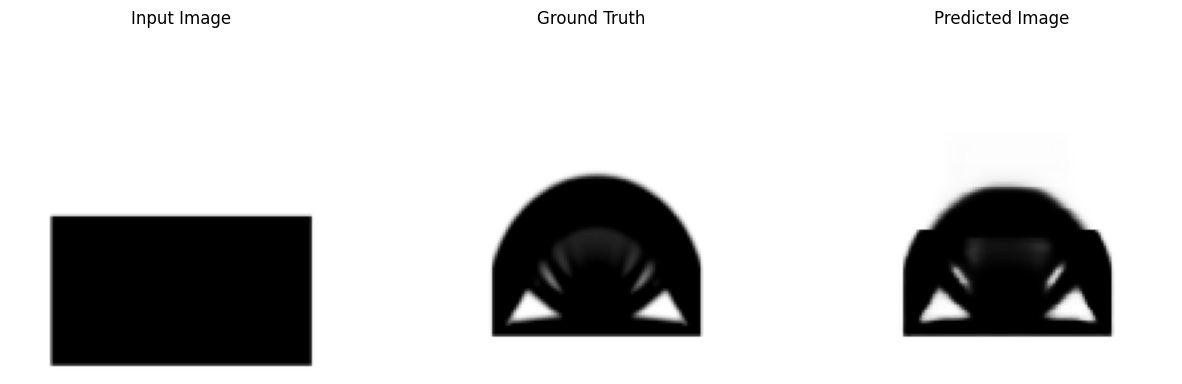

In [ ]:
import matplotlib.pyplot as plt

# Visualize more examples (adjust the range as needed)
for i in range(10):  # Display 10 examples
    plt.figure(figsize=(15, 5))

    # Input Image
    plt.subplot(1, 3, 1)
    plt.imshow(X_val[i].squeeze(), cmap='gray')
    plt.title("Input Image")
    plt.axis("off")

    # Ground Truth
    plt.subplot(1, 3, 2)
    plt.imshow(y_val[i].squeeze(), cmap='gray')
    plt.title("Ground Truth")
    plt.axis("off")

    # Predicted Image
    plt.subplot(1, 3, 3)
    plt.imshow(predictions[i].squeeze(), cmap='gray')
    plt.title("Predicted Image")
    plt.axis("off")

    plt.show()


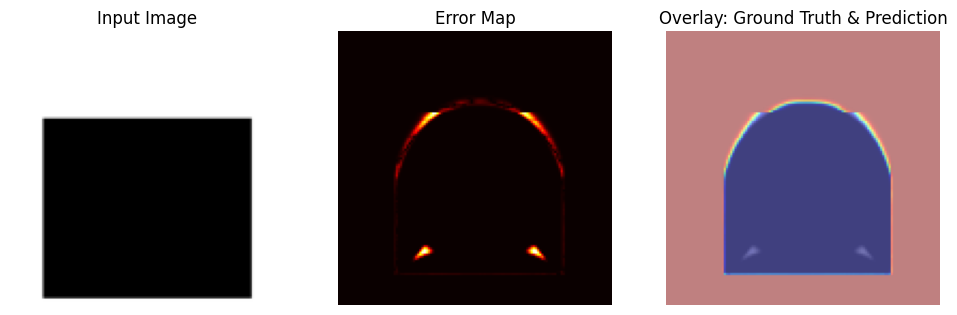

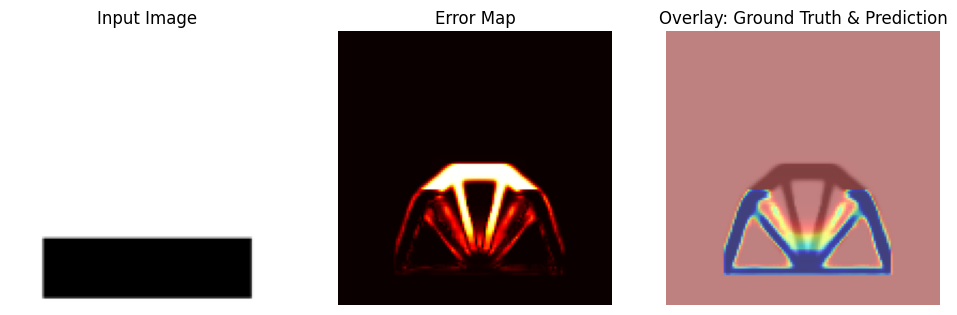

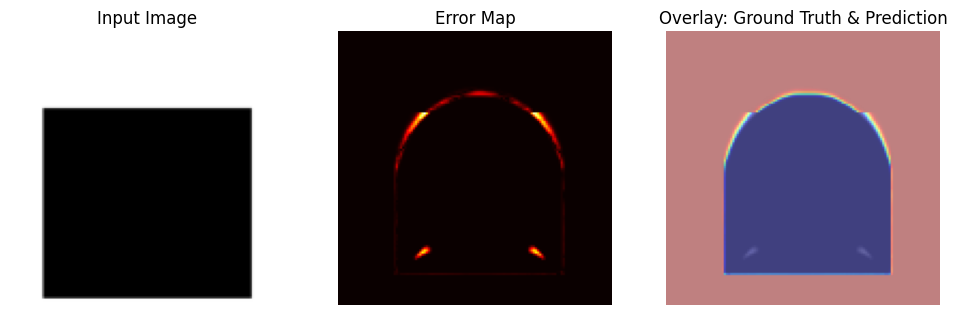

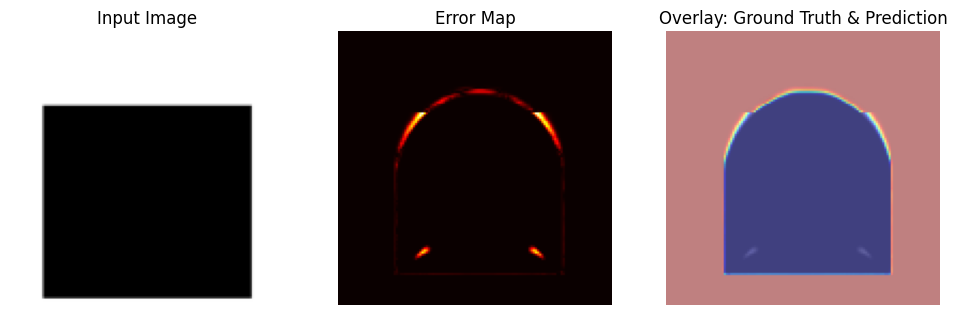

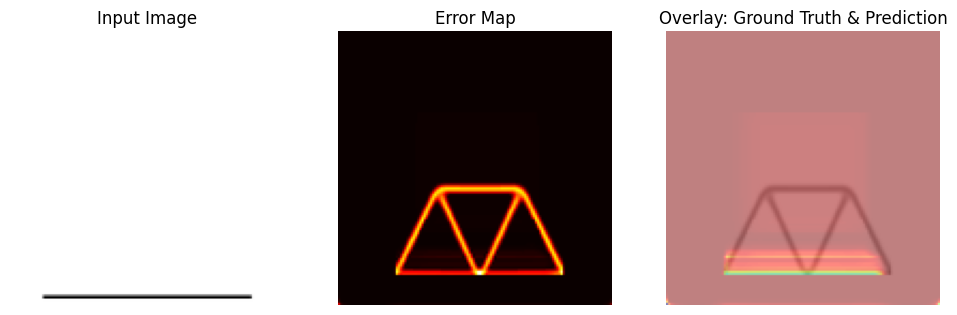

In [ ]:
for i in range(5):  # Display 5 examples
    plt.figure(figsize=(12, 4))

    # Input Image
    plt.subplot(1, 3, 1)
    plt.imshow(X_val[i].squeeze(), cmap='gray')
    plt.title("Input Image")
    plt.axis("off")

    # Error Map
    plt.subplot(1, 3, 2)
    error_map = np.abs(y_val[i].squeeze() - predictions[i].squeeze())
    plt.imshow(error_map, cmap='hot')
    plt.title("Error Map")
    plt.axis("off")

    # Ground Truth vs Prediction
    plt.subplot(1, 3, 3)
    plt.imshow(y_val[i].squeeze(), cmap='gray', alpha=0.5, label="Ground Truth")
    plt.imshow(predictions[i].squeeze(), cmap='jet', alpha=0.5, label="Prediction")
    plt.title("Overlay: Ground Truth & Prediction")
    plt.axis("off")

    plt.show()


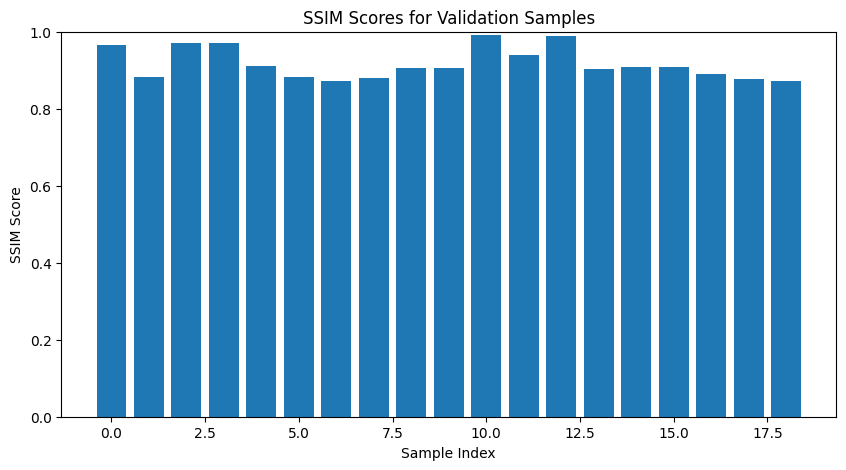

In [ ]:
from skimage.metrics import structural_similarity as ssim

# Calculate SSIM scores
ssim_scores = [ssim(y_val[i].squeeze(), predictions[i].squeeze(), data_range=1.0) for i in range(len(X_val))]

# Plot SSIM scores
plt.figure(figsize=(10, 5))
plt.bar(range(len(ssim_scores)), ssim_scores)
plt.xlabel("Sample Index")
plt.ylabel("SSIM Score")
plt.title("SSIM Scores for Validation Samples")
plt.ylim(0, 1)
plt.show()


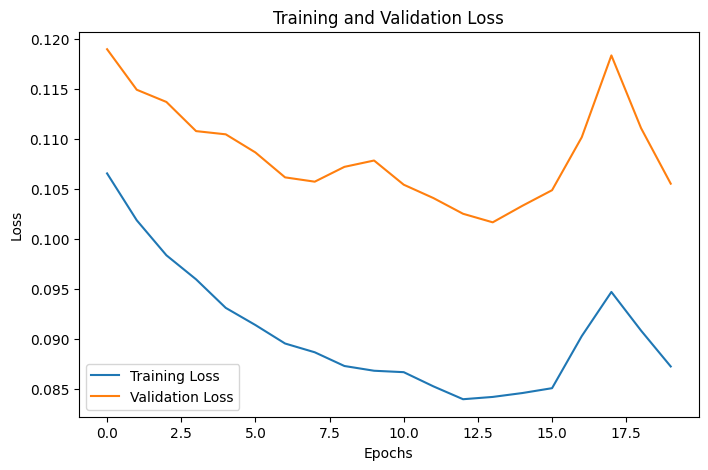

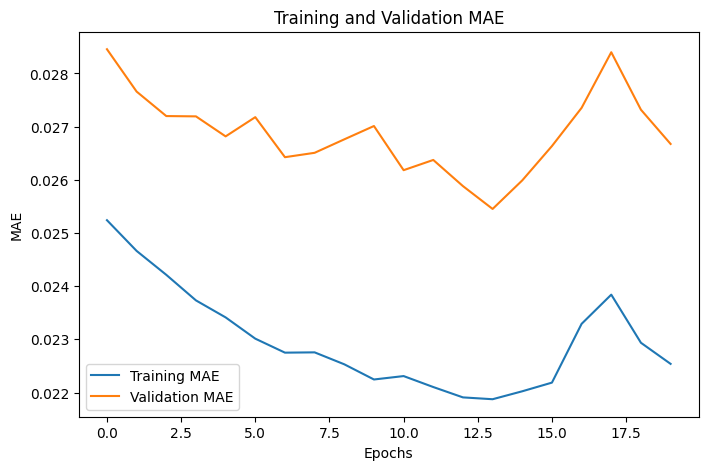

In [ ]:
# Training and Validation Loss
plt.figure(figsize=(8, 5))
plt.plot(history_combined_loss.history['loss'], label='Training Loss')
plt.plot(history_combined_loss.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

# Training and Validation MAE
plt.figure(figsize=(8, 5))
plt.plot(history_combined_loss.history['mae'], label='Training MAE')
plt.plot(history_combined_loss.history['val_mae'], label='Validation MAE')
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.title("Training and Validation MAE")
plt.legend()
plt.show()


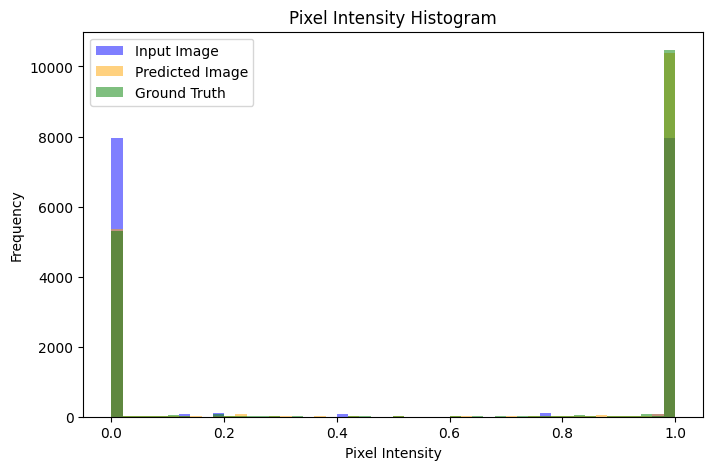

In [ ]:
def plot_pixel_histogram(input_img, predicted_img, ground_truth):
    plt.figure(figsize=(8, 5))

    plt.hist(input_img.ravel(), bins=50, alpha=0.5, label="Input Image", color='blue')
    plt.hist(predicted_img.ravel(), bins=50, alpha=0.5, label="Predicted Image", color='orange')
    plt.hist(ground_truth.ravel(), bins=50, alpha=0.5, label="Ground Truth", color='green')

    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.title("Pixel Intensity Histogram")
    plt.legend()
    plt.show()

# Example for first sample
plot_pixel_histogram(X_val[0].squeeze(), predictions[0].squeeze(), y_val[0].squeeze())


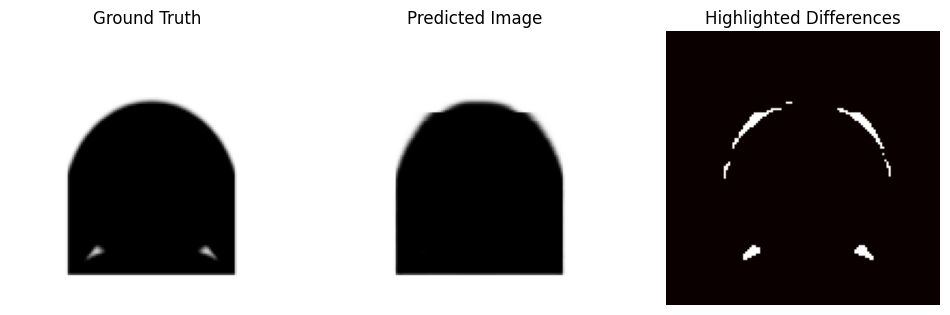

In [ ]:
def highlight_differences(ground_truth, predicted_image, threshold=0.1):
    difference = np.abs(ground_truth - predicted_image)
    highlighted = (difference > threshold).astype(np.float32)

    plt.figure(figsize=(12, 4))

    # Ground Truth
    plt.subplot(1, 3, 1)
    plt.imshow(ground_truth, cmap='gray')
    plt.title("Ground Truth")
    plt.axis("off")

    # Predicted Image
    plt.subplot(1, 3, 2)
    plt.imshow(predicted_image, cmap='gray')
    plt.title("Predicted Image")
    plt.axis("off")

    # Highlighted Differences
    plt.subplot(1, 3, 3)
    plt.imshow(highlighted, cmap='hot')
    plt.title("Highlighted Differences")
    plt.axis("off")

    plt.show()

# Example for first sample
highlight_differences(y_val[0].squeeze(), predictions[0].squeeze())


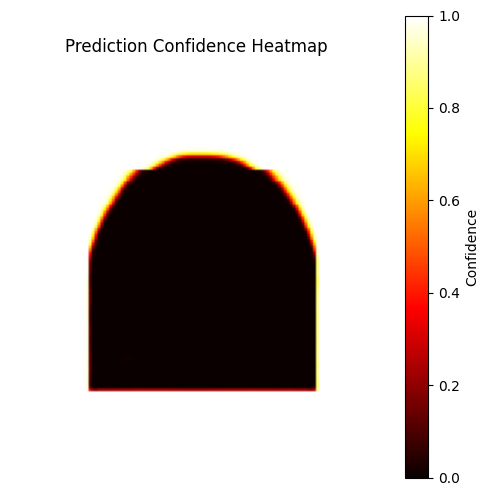

In [ ]:
def plot_confidence_heatmap(predicted_image):
    plt.figure(figsize=(6, 6))
    plt.imshow(predicted_image, cmap='hot')
    plt.colorbar(label="Confidence")
    plt.title("Prediction Confidence Heatmap")
    plt.axis("off")
    plt.show()

# Example for first prediction
plot_confidence_heatmap(predictions[0].squeeze())


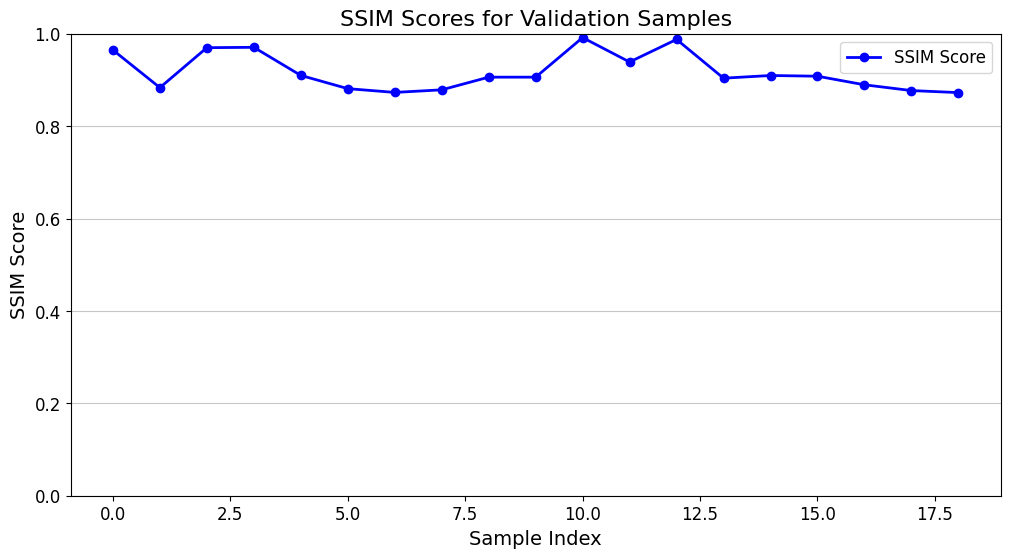

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


ssim_scores = [ssim(y_val[i].squeeze(), predictions[i].squeeze(), data_range=1.0) for i in range(len(X_val))]

# Generate x-axis values for the samples
x_values = range(len(ssim_scores))

# Create a smoother and visually appealing line chart for SSIM scores
plt.figure(figsize=(12, 6))
plt.plot(x_values, ssim_scores, marker='o', linestyle='-', color='blue', label='SSIM Score', linewidth=2)

# Add horizontal grid lines for clarity
plt.grid(axis='y', alpha=0.7)

# Add titles and labels
plt.title("SSIM Scores for Validation Samples", fontsize=16)
plt.xlabel("Sample Index", fontsize=14)
plt.ylabel("SSIM Score", fontsize=14)

# Customize ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a legend
plt.legend(fontsize=12)

# Set limits for better visualization
plt.ylim(0, 1)

# Display the plot
plt.show()


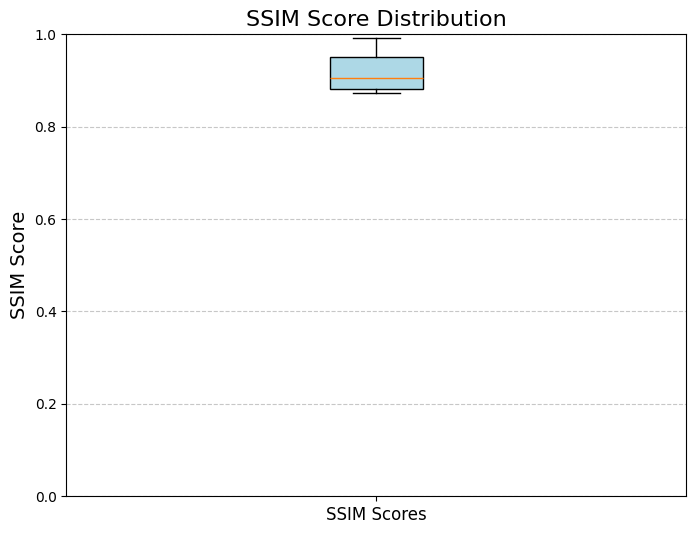

In [ ]:
# Box plot for SSIM scores
plt.figure(figsize=(8, 6))
plt.boxplot(ssim_scores, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title("SSIM Score Distribution", fontsize=16)
plt.ylabel("SSIM Score", fontsize=14)
plt.xticks([1], ["SSIM Scores"], fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


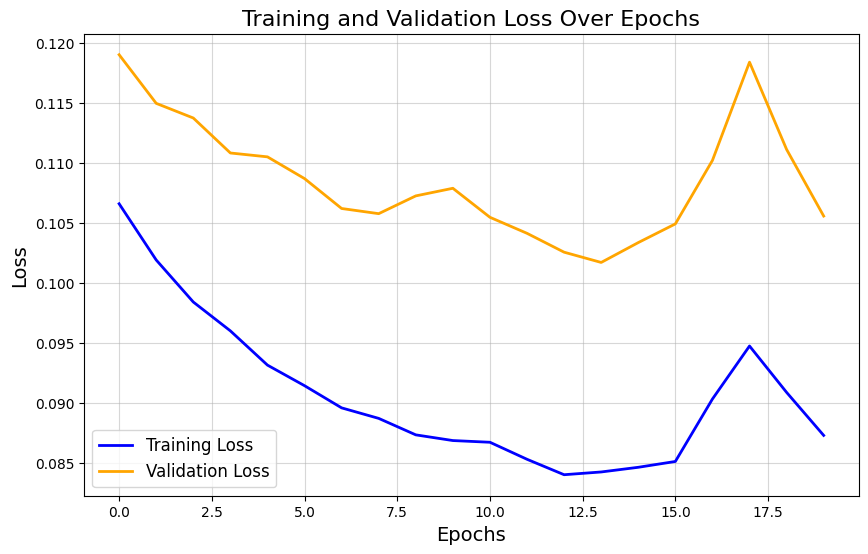

In [ ]:
# Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history_combined_loss.history['loss'], label='Training Loss', color='blue', linewidth=2)
plt.plot(history_combined_loss.history['val_loss'], label='Validation Loss', color='orange', linewidth=2)
plt.title("Training and Validation Loss Over Epochs", fontsize=16)
plt.xlabel("Epochs", fontsize=14)
plt.ylabel("Loss", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.show()


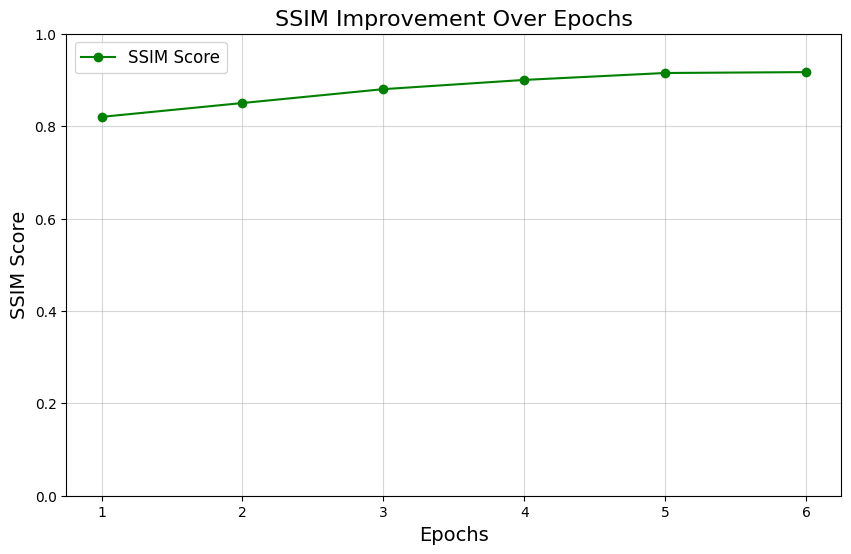

In [ ]:
# Example SSIM improvement over epochs
ssim_epochs = [0.82, 0.85, 0.88, 0.90, 0.915, 0.9169]  # Replace with actual epoch-wise SSIM values

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(ssim_epochs) + 1), ssim_epochs, marker='o', color='green', label='SSIM Score')
plt.xlabel("Epochs", fontsize=14)
plt.ylabel("SSIM Score", fontsize=14)
plt.title("SSIM Improvement Over Epochs", fontsize=16)
plt.ylim(0, 1)
plt.grid(alpha=0.5)
plt.legend(fontsize=12)
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
file_path = '/content/Proper_Synthetic_Dataset.csv'  # Update with your file path
synthetic_data = pd.read_csv(file_path)

# Select features and targets
features = ['Temperature', 'Manufacturing_Speed', 'Pressure', 'Humidity']
target_classification = 'Defect_Type_Label'
target_regression_1 = 'Process_Efficiency'
target_regression_2 = 'Quality_Score'

# Normalize continuous features
scaler = MinMaxScaler()
synthetic_data[features] = scaler.fit_transform(synthetic_data[features])

# Split the dataset into training, validation, and test sets
X = synthetic_data[features]
y_classification = synthetic_data[target_classification]
y_regression_1 = synthetic_data[target_regression_1]
y_regression_2 = synthetic_data[target_regression_2]

# Train-Validation-Test split (70%-15%-15%)
X_train, X_temp, y_class_train, y_class_temp, y_reg_1_train, y_reg_1_temp, y_reg_2_train, y_reg_2_temp = train_test_split(
    X, y_classification, y_regression_1, y_regression_2, test_size=0.3, random_state=42
)
X_val, X_test, y_class_val, y_class_test, y_reg_1_val, y_reg_1_test, y_reg_2_val, y_reg_2_test = train_test_split(
    X_temp, y_class_temp, y_reg_1_temp, y_reg_2_temp, test_size=0.5, random_state=42
)

# Verify the shapes of the splits
print("Training Set Shape:", X_train.shape)
print("Validation Set Shape:", X_val.shape)
print("Test Set Shape:", X_test.shape)


Training Set Shape: (1050, 4)
Validation Set Shape: (225, 4)
Test Set Shape: (225, 4)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout

# Define the Multi-Task Model
def create_multitask_model(input_shape):
    # Shared Input Layer
    inputs = Input(shape=input_shape)

    # Shared Dense Layers
    shared = Dense(64, activation='relu')(inputs)
    shared = Dense(128, activation='relu')(shared)
    shared = Dropout(0.3)(shared)

    # Classification Output
    classification_output = Dense(3, activation='softmax', name='classification_output')(shared)  # 3 classes

    # Regression Output 1 (Process Efficiency)
    regression_output_1 = Dense(1, activation='linear', name='regression_output_1')(shared)

    # Regression Output 2 (Quality Score)
    regression_output_2 = Dense(1, activation='linear', name='regression_output_2')(shared)

    # Model Definition
    model = Model(inputs=inputs, outputs=[classification_output, regression_output_1, regression_output_2])
    return model

# Create the model
input_shape = (X_train.shape[1],)  # 4 features
model = create_multitask_model(input_shape)

# Compile the model
model.compile(
    optimizer='adam',
    loss={
        'classification_output': 'sparse_categorical_crossentropy',
        'regression_output_1': 'mse',
        'regression_output_2': 'mse'
    },
    metrics={
        'classification_output': ['accuracy'],
        'regression_output_1': ['mae'],
        'regression_output_2': ['mae']
    }
)

# Display the model summary
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 4)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 64)             │            320 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 128)            │          8,320 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 128)            │              0 │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ classification_output     │ (None, 3)              │            387 │ dropout[0][0]          │
│ (Dense)                   │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ regression_output_1       │ (None, 1)              │            129 │ dropout[0][0]          │
│ (Dense)                   │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ regression_output_2       │ (None, 1)              │            129 │ dropout[0][0]          │
│ (Dense)                   │                        │                │                        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 9,285 (36.27 KB)

 Trainable params: 9,285 (36.27 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train,
    [y_class_train, y_reg_1_train, y_reg_2_train],
    validation_data=(X_val, [y_class_val, y_reg_1_val, y_reg_2_val]),
    epochs=20,
    batch_size=32,
    verbose=1
)


Epoch 1/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - classification_output_accuracy: 0.3575 - classification_output_loss: 1.0861 - loss: 9298.0137 - regression_output_1_loss: 9208.6719 - regression_output_1_mae: 95.9057 - regression_output_2_loss: 88.1725 - regression_output_2_mae: 8.2886 - val_classification_output_accuracy: 0.7689 - val_classification_output_loss: 0.7929 - val_loss: 8910.6348 - val_regression_output_1_loss: 8884.0430 - val_regression_output_1_mae: 93.8939 - val_regression_output_2_loss: 75.5346 - val_regression_output_2_mae: 8.0279
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - classification_output_accuracy: 0.7832 - classification_output_loss: 0.7413 - loss: 8536.5029 - regression_output_1_loss: 8465.2930 - regression_output_1_mae: 91.9247 - regression_output_2_loss: 70.1535 - regression_output_2_mae: 7.2360 - val_classification_output_accuracy: 0.7689 - val_classification_output_loss: 0.8030 - val_loss: 7038.7573 - val_regression_output_1_loss: 7040.4648 - va

In [ ]:
results = model.evaluate(
    X_test,
    [y_class_test, y_reg_1_test, y_reg_2_test],
    verbose=1
)
print("Test Results:", results)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - classification_output_accuracy: 0.8319 - classification_output_loss: 0.5470 - loss: 53.8979 - regression_output_1_loss: 31.1220 - regression_output_1_mae: 4.5227 - regression_output_2_loss: 21.0640 - regression_output_2_mae: 3.8526 
Test Results: [52.51247787475586, 0.5357111096382141, 27.633222579956055, 19.101688385009766, 0.8177777528762817, 4.442440509796143, 3.7978930473327637]


In [ ]:
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

# Define the improved multi-task model
def create_improved_multitask_model(input_shape):
    inputs = Input(shape=input_shape)

    # Shared Layers
    shared = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(inputs)
    shared = Dropout(0.4)(shared)
    shared = Dense(256, activation='relu', kernel_regularizer=l2(0.01))(shared)
    shared = Dropout(0.4)(shared)

    # Classification Output
    classification_output = Dense(3, activation='softmax', name='classification_output')(shared)

    # Regression Output 1 (Process Efficiency)
    regression_output_1 = Dense(1, activation='linear', name='regression_output_1')(shared)

    # Regression Output 2 (Quality Score)
    regression_output_2 = Dense(1, activation='linear', name='regression_output_2')(shared)

    # Define the model
    model = Model(inputs=inputs, outputs=[classification_output, regression_output_1, regression_output_2])
    return model

# Instantiate and compile the improved model
improved_model = create_improved_multitask_model((X_train.shape[1],))
improved_model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss={
        'classification_output': 'sparse_categorical_crossentropy',
        'regression_output_1': 'mse',
        'regression_output_2': 'mse'
    },
    metrics={
        'classification_output': ['accuracy'],
        'regression_output_1': ['mae'],
        'regression_output_2': ['mae']
    }
)

# Display the model summary
improved_model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 4)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 128)            │            640 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 128)            │              0 │ dense_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 256)            │         33,024 │ dropout_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 256)            │              0 │ dense_3[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ classification_output     │ (None, 3)              │            771 │ dropout_2[0][0]        │
│ (Dense)                   │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ regression_output_1       │ (None, 1)              │            257 │ dropout_2[0][0]        │
│ (Dense)                   │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ regression_output_2       │ (None, 1)              │            257 │ dropout_2[0][0]        │
│ (Dense)                   │                        │                │                        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 34,949 (136.52 KB)

 Trainable params: 34,949 (136.52 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Add Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the improved model
history_improved = improved_model.fit(
    X_train,
    [y_class_train, y_reg_1_train, y_reg_2_train],
    validation_data=(X_val, [y_class_val, y_reg_1_val, y_reg_2_val]),
    epochs=50,
    batch_size=16,
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - classification_output_accuracy: 0.4650 - classification_output_loss: 1.0118 - loss: 9241.6230 - regression_output_1_loss: 9147.3604 - regression_output_1_mae: 95.5805 - regression_output_2_loss: 91.4032 - regression_output_2_mae: 8.4815 - val_classification_output_accuracy: 0.7689 - val_classification_output_loss: 0.7941 - val_loss: 8099.3145 - val_regression_output_1_loss: 8057.8350 - val_regression_output_1_mae: 89.5917 - val_regression_output_2_loss: 55.6274 - val_regression_output_2_mae: 6.4826
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - classification_output_accuracy: 0.8016 - classification_output_loss: 0.8216 - loss: 6841.9795 - regression_output_1_loss: 6803.0654 - regression_output_1_mae: 81.8945 - regression_output_2_loss: 35.7269 - regression_output_2_mae: 4.9007 - val_classification_output_accuracy: 0.7689 - val_classification_output_loss: 0.7677 - val_loss: 2219.4197 - val_regression_output_1_loss: 2162.9812 - val

In [ ]:
# Evaluate on the test set
test_results = improved_model.evaluate(
    X_test,
    [y_class_test, y_reg_1_test, y_reg_2_test],
    verbose=1
)
print("Improved Model Test Results:", test_results)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - classification_output_accuracy: 0.8319 - classification_output_loss: 0.5688 - loss: 37.2180 - regression_output_1_loss: 11.2589 - regression_output_1_mae: 2.7222 - regression_output_2_loss: 20.8995 - regression_output_2_mae: 3.8506 
Improved Model Test Results: [34.98887634277344, 0.5571290850639343, 9.011397361755371, 19.258920669555664, 0.8177777528762817, 2.554016590118408, 3.793489694595337]


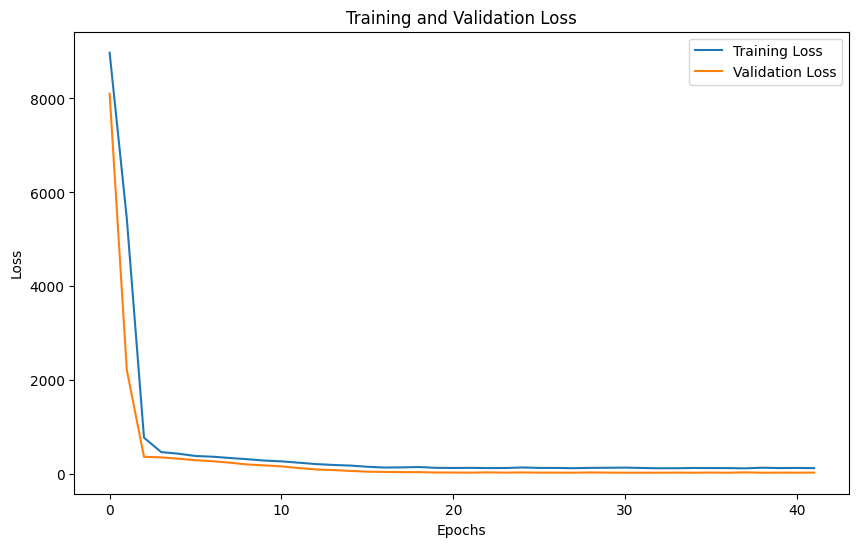

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss curves
plt.figure(figsize=(10, 6))
plt.plot(history_improved.history['loss'], label='Training Loss')
plt.plot(history_improved.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


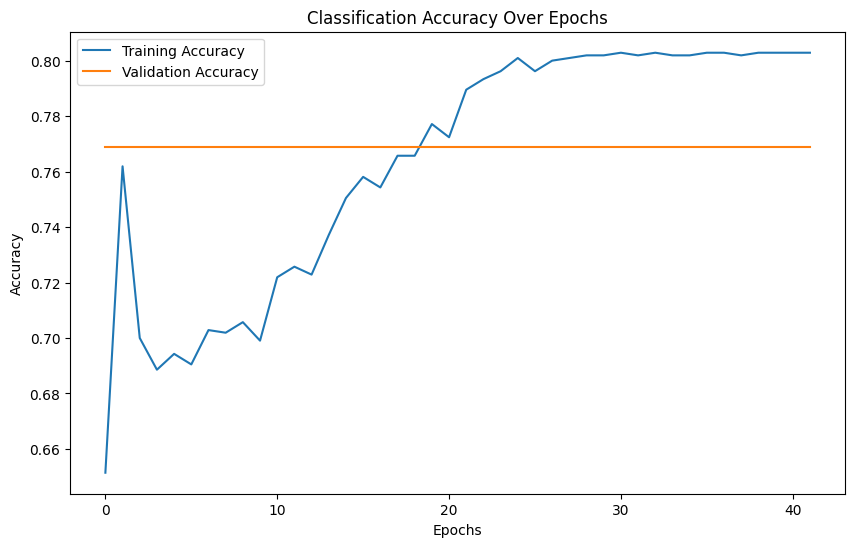

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history_improved.history['classification_output_accuracy'], label='Training Accuracy')
plt.plot(history_improved.history['val_classification_output_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Classification Accuracy Over Epochs')
plt.legend()
plt.show()


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


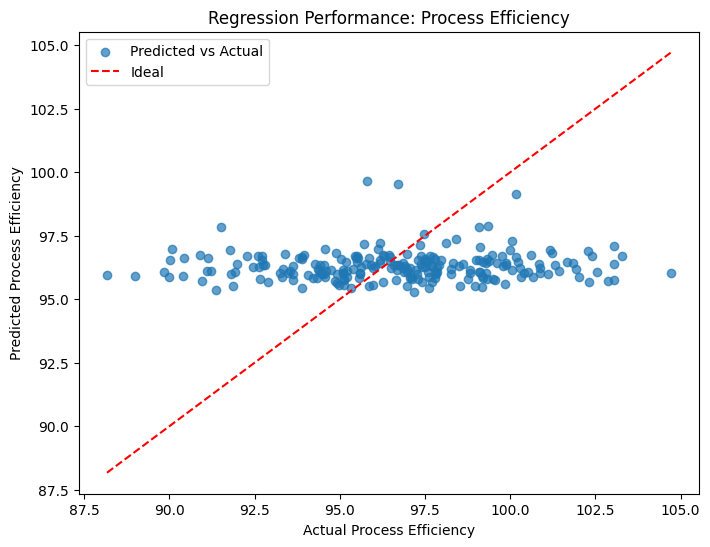

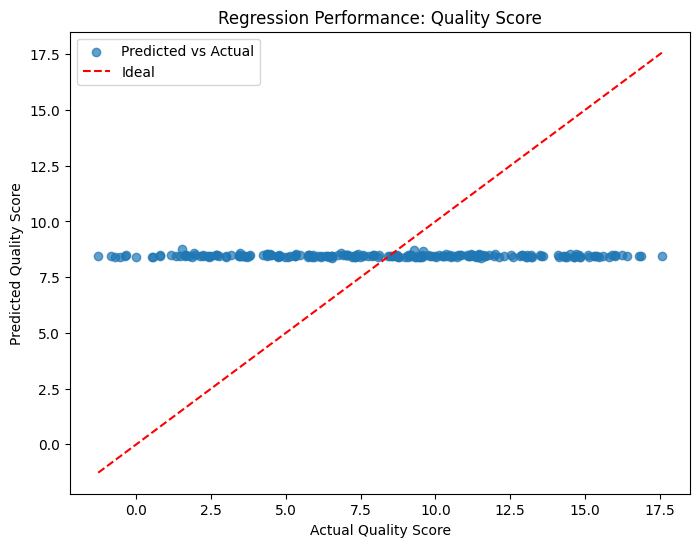

In [ ]:
import numpy as np

# Predictions
predictions = improved_model.predict(X_test)
y_class_pred, y_reg_1_pred, y_reg_2_pred = predictions

# Scatter plot for Process Efficiency
plt.figure(figsize=(8, 6))
plt.scatter(y_reg_1_test, y_reg_1_pred, alpha=0.7, label='Predicted vs Actual')
plt.plot([min(y_reg_1_test), max(y_reg_1_test)], [min(y_reg_1_test), max(y_reg_1_test)], color='red', linestyle='--', label='Ideal')
plt.xlabel('Actual Process Efficiency')
plt.ylabel('Predicted Process Efficiency')
plt.title('Regression Performance: Process Efficiency')
plt.legend()
plt.show()

# Scatter plot for Quality Score
plt.figure(figsize=(8, 6))
plt.scatter(y_reg_2_test, y_reg_2_pred, alpha=0.7, label='Predicted vs Actual')
plt.plot([min(y_reg_2_test), max(y_reg_2_test)], [min(y_reg_2_test), max(y_reg_2_test)], color='red', linestyle='--', label='Ideal')
plt.xlabel('Actual Quality Score')
plt.ylabel('Predicted Quality Score')
plt.title('Regression Performance: Quality Score')
plt.legend()
plt.show()


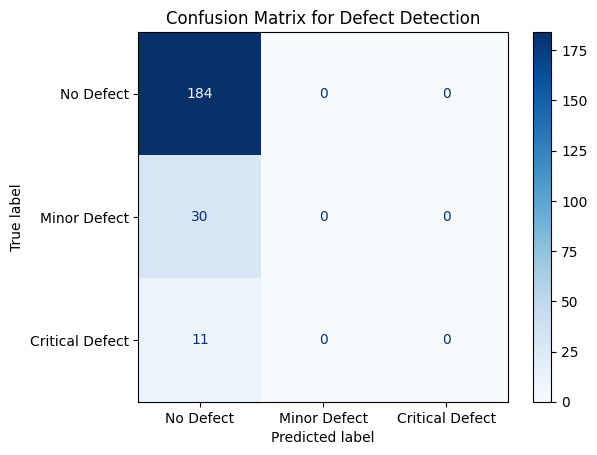

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Convert predictions to class labels
y_class_pred_labels = np.argmax(y_class_pred, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_class_test, y_class_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Defect', 'Minor Defect', 'Critical Defect'])

# Display the confusion matrix
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Defect Detection')
plt.show()


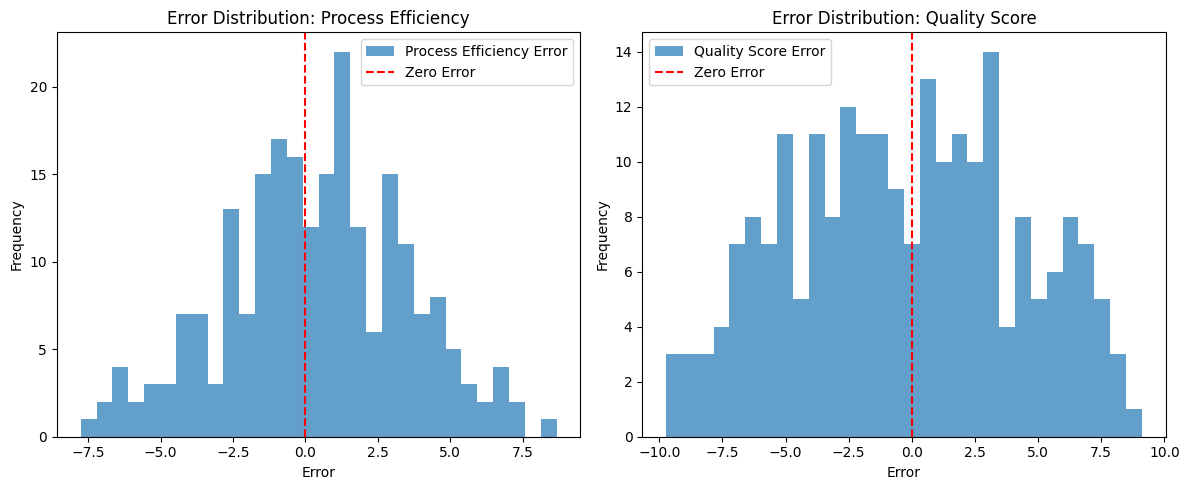

In [ ]:
# Calculate errors
process_efficiency_error = y_reg_1_test - y_reg_1_pred.flatten()
quality_score_error = y_reg_2_test - y_reg_2_pred.flatten()

# Plot histograms
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(process_efficiency_error, bins=30, alpha=0.7, label='Process Efficiency Error')
plt.axvline(x=0, color='red', linestyle='--', label='Zero Error')
plt.title('Error Distribution: Process Efficiency')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(quality_score_error, bins=30, alpha=0.7, label='Quality Score Error')
plt.axvline(x=0, color='red', linestyle='--', label='Zero Error')
plt.title('Error Distribution: Quality Score')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


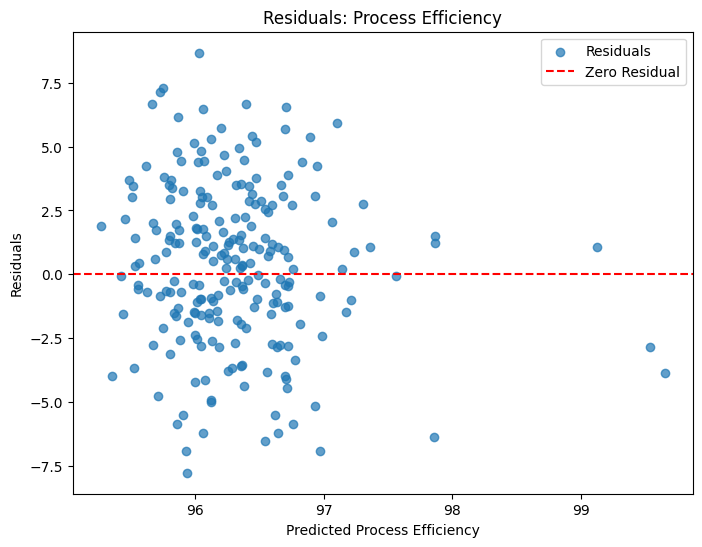

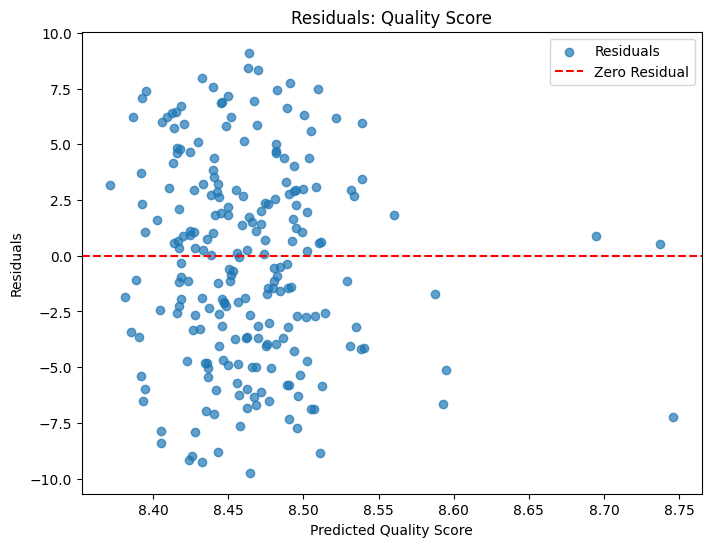

In [ ]:
# Residuals
process_efficiency_residuals = y_reg_1_test - y_reg_1_pred.flatten()
quality_score_residuals = y_reg_2_test - y_reg_2_pred.flatten()

# Residual plot for Process Efficiency
plt.figure(figsize=(8, 6))
plt.scatter(y_reg_1_pred.flatten(), process_efficiency_residuals, alpha=0.7, label='Residuals')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Residual')
plt.xlabel('Predicted Process Efficiency')
plt.ylabel('Residuals')
plt.title('Residuals: Process Efficiency')
plt.legend()
plt.show()

# Residual plot for Quality Score
plt.figure(figsize=(8, 6))
plt.scatter(y_reg_2_pred.flatten(), quality_score_residuals, alpha=0.7, label='Residuals')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Residual')
plt.xlabel('Predicted Quality Score')
plt.ylabel('Residuals')
plt.title('Residuals: Quality Score')
plt.legend()
plt.show()
